In [2]:
import scipy.io.wavfile as wav
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
fs, data = wav.read('/Users/azhankamil/Desktop/Azhan/SS AMU SAT/Decoding/NOAA/090729 1428 noaa-18.wav')
data_crop = data[20*fs:21*fs]
plt.figure(figsize=(12,4))
plt.plot(data_crop)
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Signal")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '090729 1428 noaa-18,wav'

In [ ]:
resample = 4
data = data[::resample]
fs = fs//resample

In [ ]:
def hilbert(data):
    analytical_signal = signal.hilbert(data)
    amplitude_envelope = np.abs(analytical_signal)
    return amplitude_envelope
data_am = hilbert(data)

In [ ]:
from PIL import Image
frame_width = int(0.5*fs)
w, h = frame_width, data_am.shape[0]//frame_width
image = Image.new('RGB', (w, h))
px, py = 0, 0
for p in range(data_am.shape[0]):
    lum = int(data_am[p]//32 - 32)
    if lum < 0: lum = 0
    if lum > 255: lum = 255
    image.putpixel((px, py), (0, lum, 0))
    px += 1
    if px >= w:
        if (py % 50) == 0:
            print(f"Line saved {py} of {h}")
        px = 0
        py += 1
        if py >= h:
            break

TypeError: only size-1 arrays can be converted to Python scalars

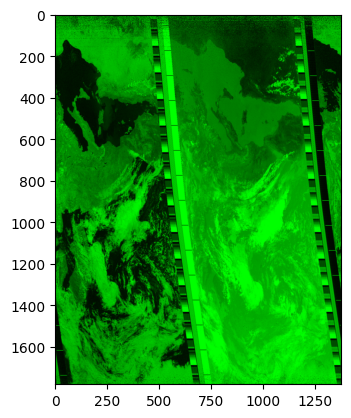

In [ ]:
image = image.resize((w, 1*h))
plt.imshow(image)
plt.show()